# Looking For Business opportunity in Brazil

### Getting the list of Bralizian Capitals from WikipediaLooking For Business opportunity in Brazil

In [67]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

page = requests.get('https://pt.wikipedia.org/wiki/Lista_de_capitais_do_Brasil_por_%C3%A1rea')
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.table
df = pd.read_html(str(table))
data = df[0]

data = data.drop(columns = ['Posição'])

data['Sede de governo'] = data['Sede de governo'].replace(
    to_replace = "Salvador[nota 1]",
    value = "Salvador"
)

data['Search Key'] = data['Sede de governo'] + "," +  data['Unidade federativa']

data['Área (km²)'] = data['Área (km²)'].str.replace(",","")
data['Área (km²)'] = data['Área (km²)'].str.replace('\xa0',"")
data['Área (km²)'] = data['Área (km²)'].astype(int)/(10**3)
data

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key
0,Porto Velho,1100205,Rondônia,34082.366,"Porto Velho,Rondônia"
1,Manaus,1302603,Amazonas,11401.058,"Manaus,Amazonas"
2,Rio Branco,1200401,Acre,9222.577,"Rio Branco,Acre"
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul"
4,Macapá,1600303,Amapá,6407.123,"Macapá,Amapá"
5,Brasília,5300108,Distrito Federal,5801.937,"Brasília,Distrito Federal"
6,Boa Vista,1400100,Roraima,5687.064,"Boa Vista,Roraima"
7,Cuiabá,5103403,Mato Grosso,3538.167,"Cuiabá,Mato Grosso"
8,Palmas,1721000,Tocantins,2218.934,"Palmas,Tocantins"
9,Teresina,2211001,Piauí,1755.698,"Teresina,Piauí"


### Getting their coordinates from Geopy

In [68]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

data1 = pd.DataFrame(columns=['City','Latitude','Longitude'])
for k in data['Search Key']:
    address = k
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    data1.loc[len(data1)] = [address,latitude,longitude]
    print('The geograpical coordinate of {} are {}, {}.'.format(k,latitude, longitude))


The geograpical coordinate of Porto Velho,Rondônia are -8.7494525, -63.8735438.
The geograpical coordinate of Manaus,Amazonas are -3.1316333, -59.9825041.
The geograpical coordinate of Rio Branco,Acre are -9.9765362, -67.8220778.
The geograpical coordinate of Campo Grande,Mato Grosso do Sul are -20.4640173, -54.6162947.
The geograpical coordinate of Macapá,Amapá are 0.0401529, -51.0569588.
The geograpical coordinate of Brasília,Distrito Federal are -15.7754462, -47.7970891.
The geograpical coordinate of Boa Vista,Roraima are 2.8208478, -60.6719582.
The geograpical coordinate of Cuiabá,Mato Grosso are -15.5986686, -56.0991301.
The geograpical coordinate of Palmas,Tocantins are -10.1835604, -48.3337793.
The geograpical coordinate of Teresina,Piauí are -5.0896403, -42.809588.
The geograpical coordinate of São Paulo,São Paulo are -23.5506507, -46.6333824.
The geograpical coordinate of Rio de Janeiro,Rio de Janeiro are -22.9110137, -43.2093727.
The geograpical coordinate of Belém,Pará are -

In [69]:
Cidades = data.join(data1.set_index('City'), on='Search Key')
#Cidades.to_csv("week4_projct_cidades")
Cidades


,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,Latitude,Longitude
0,Porto Velho,1100205,Rondônia,34082.366,"Porto Velho,Rondônia",-8.749453,-63.873544
1,Manaus,1302603,Amazonas,11401.058,"Manaus,Amazonas",-3.131633,-59.982504
2,Rio Branco,1200401,Acre,9222.577,"Rio Branco,Acre",-9.976536,-67.822078
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul",-20.464017,-54.616295
4,Macapá,1600303,Amapá,6407.123,"Macapá,Amapá",0.040153,-51.056959
5,Brasília,5300108,Distrito Federal,5801.937,"Brasília,Distrito Federal",-15.775446,-47.797089
6,Boa Vista,1400100,Roraima,5687.064,"Boa Vista,Roraima",2.820848,-60.671958
7,Cuiabá,5103403,Mato Grosso,3538.167,"Cuiabá,Mato Grosso",-15.598669,-56.099130
8,Palmas,1721000,Tocantins,2218.934,"Palmas,Tocantins",-10.183560,-48.333779
9,Teresina,2211001,Piauí,1755.698,"Teresina,Piauí",-5.089640,-42.809588


### Visulizing the cities in a map

In [70]:
import folium # map rendering library
map_tor = folium.Map(location=[latitude, longitude], zoom_start=4)

# add markers to map
for lat, lng, label,area in zip(Cidades['Latitude'],Cidades['Longitude'], Cidades['Search Key'],Cidades['Área (km²)']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5 + area * 15/34000,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_tor)  
    
map_tor

### Conecting to Fourquare API and getting the most popular venies for each city

In [127]:
CLIENT_ID = 'QCTDZ0ZUCAKREBPVLLQKIZ5K2DFU2XXB5P33QVNHHK2MHDRP' # your Foursquare ID
CLIENT_SECRET = 'ZHHO4MNOYERHFZJJKQ02ANMKQPXCTAWWYVXKFWX2VXM451R1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QCTDZ0ZUCAKREBPVLLQKIZ5K2DFU2XXB5P33QVNHHK2MHDRP
CLIENT_SECRET:ZHHO4MNOYERHFZJJKQ02ANMKQPXCTAWWYVXKFWX2VXM451R1


In [128]:
def getNearbyVenues(names, latitudes, longitudes,area):
    venues_list=[]
    
    for name, lat, lng, areia in zip(names, latitudes, longitudes,area):
        print(name)        
        radius = (areia*1000)**(1/2)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['id']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'City Latitude', 
                  'City Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue ID']
    
    return(nearby_venues)

In [129]:
Locals = getNearbyVenues(names=Cidades['Search Key'],
                                   latitudes=Cidades['Latitude'],
                                   longitudes=Cidades['Longitude'],
                                   area=Cidades['Área (km²)']
                        )

Porto Velho,Rondônia
Manaus,Amazonas
Rio Branco,Acre
Campo Grande,Mato Grosso do Sul
Macapá,Amapá
Brasília,Distrito Federal
Boa Vista,Roraima
Cuiabá,Mato Grosso
Palmas,Tocantins
Teresina,Piauí
São Paulo,São Paulo
Rio de Janeiro,Rio de Janeiro
Belém,Pará
São Luís,Maranhão
Goiânia,Goiás
Salvador,Bahia
Maceió,Alagoas
Porto Alegre,Rio Grande do Sul
Curitiba,Paraná
Florianópolis,Santa Catarina
Belo Horizonte,Minas Gerais
Fortaleza,Ceará
Recife,Pernambuco
João Pessoa,Paraíba
Aracaju,Sergipe
Natal,Rio Grande do Norte
Vitória,Espírito Santo


In [130]:
Locals = Locals.replace('Brazilian Restaurant','Restaurant')


In [131]:
Loc_dummies = pd.get_dummies(Locals[['Venue Category']], prefix ="",prefix_sep="")
Loc_dummies['cidade'] = Locals['City']

fixed_columns = [Loc_dummies.columns[-1]] + list(Loc_dummies.columns[:-1])
Loc_dummies = Loc_dummies[fixed_columns]
Loc_dummies.head()

,cidade,Acai House,Accessories Store,Adult Boutique,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Porto Velho,Rondônia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Porto Velho,Rondônia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Porto Velho,Rondônia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Porto Velho,Rondônia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Porto Velho,Rondônia",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [132]:
Loc_grouped = Loc_dummies.groupby('cidade').mean().reset_index()
Loc_grouped.head()

,cidade,Acai House,Accessories Store,Adult Boutique,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Art Museum,...,Vegetarian / Vegan Restaurant,Veterinarian,Video Game Store,Video Store,Water Park,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,"Aracaju,Sergipe",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
1,"Belo Horizonte,Minas Gerais",0.010204,0.020408,0.0,0.0,0.0,0.0,0.0,0.020408,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.010204,0.000000,0.0,0.0
2,"Belém,Pará",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.013699,0.0,0.0
3,"Boa Vista,Roraima",0.000000,0.010000,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,"Brasília,Distrito Federal",0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [133]:
num_top_venues = 15
for city in Loc_grouped['cidade']:
    print('----'+city+'----')
    temp = Loc_grouped[Loc_grouped['cidade'] == city].T.reset_index()
    temp.columns=['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Aracaju,Sergipe----
                                venue  freq
0                       Garden Center  0.11
1                          Restaurant  0.11
2                                 Gym  0.11
3                              Bakery  0.11
4                       Grocery Store  0.11
5                           BBQ Joint  0.11
6                         Snack Place  0.11
7                         Supermarket  0.11
8                               Diner  0.11
9                              Office  0.00
10                       Optical Shop  0.00
11                         Pastelaria  0.00
12      Northern Brazilian Restaurant  0.00
13               Other Great Outdoors  0.00
14  Northeastern Brazilian Restaurant  0.00


----Belo Horizonte,Minas Gerais----
                   venue  freq
0             Restaurant  0.11
1                    Bar  0.10
2                   Café  0.08
3            Coffee Shop  0.02
4              BBQ Joint  0.02
5                 Market  0.02
6         Breakfa

### Clustering the cities

In [134]:
#Start Clustering
from sklearn.cluster import KMeans
# set number of clusters
k = 4

loc_clustering = Loc_grouped.drop('cidade', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=k, random_state=0).fit(loc_clustering )

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 0, 0, 3, 3, 0, 3, 0, 0, 3])

In [135]:
Loc_grouped.insert(0,'labels',kmeans.labels_)
lol = pd.DataFrame(columns = ['Cidade','class'])
lol['Cidade'] = Loc_grouped['cidade']
lol['class'] = Loc_grouped['labels']
lol.head()

,Cidade,class
0,"Aracaju,Sergipe",2
1,"Belo Horizonte,Minas Gerais",0
2,"Belém,Pará",0
3,"Boa Vista,Roraima",3
4,"Brasília,Distrito Federal",3


In [136]:
Cidades.head()

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,Latitude,Longitude
0,Porto Velho,1100205,Rondônia,34082.366,"Porto Velho,Rondônia",-8.749453,-63.873544
1,Manaus,1302603,Amazonas,11401.058,"Manaus,Amazonas",-3.131633,-59.982504
2,Rio Branco,1200401,Acre,9222.577,"Rio Branco,Acre",-9.976536,-67.822078
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul",-20.464017,-54.616295
4,Macapá,1600303,Amapá,6407.123,"Macapá,Amapá",0.040153,-51.056959


In [137]:
Cidades2 = Cidades.join(lol.set_index('Cidade'),on = 'Search Key')
Cidades2

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,Latitude,Longitude,class
0,Porto Velho,1100205,Rondônia,34082.366,"Porto Velho,Rondônia",-8.749453,-63.873544,3
1,Manaus,1302603,Amazonas,11401.058,"Manaus,Amazonas",-3.131633,-59.982504,3
2,Rio Branco,1200401,Acre,9222.577,"Rio Branco,Acre",-9.976536,-67.822078,3
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul",-20.464017,-54.616295,0
4,Macapá,1600303,Amapá,6407.123,"Macapá,Amapá",0.040153,-51.056959,3
5,Brasília,5300108,Distrito Federal,5801.937,"Brasília,Distrito Federal",-15.775446,-47.797089,3
6,Boa Vista,1400100,Roraima,5687.064,"Boa Vista,Roraima",2.820848,-60.671958,3
7,Cuiabá,5103403,Mato Grosso,3538.167,"Cuiabá,Mato Grosso",-15.598669,-56.099130,3
8,Palmas,1721000,Tocantins,2218.934,"Palmas,Tocantins",-10.183560,-48.333779,3
9,Teresina,2211001,Piauí,1755.698,"Teresina,Piauí",-5.089640,-42.809588,3


### Visualizing tje cities and their clusters

In [241]:
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster,area in zip(Cidades2['Latitude'], Cidades2['Longitude'], Cidades2['Search Key'], Cidades2['class'],Cidades['Área (km²)']):
    
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius= 5 + area * 15/34000,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [139]:
def return_most_common_venues(row,num_top_venues = 5):
    row_categories = row
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [140]:
Loc_grouped

num_top = 15

columns = ['cidade']

for ind in np.arange(num_top):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

resumo = pd.DataFrame(columns=columns)

resumo['cidade'] = Loc_grouped['cidade']

resumo.head()


,cidade,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,"Aracaju,Sergipe",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Belo Horizonte,Minas Gerais",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Belém,Pará",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Boa Vista,Roraima",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Brasília,Distrito Federal",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
for ind in np.arange(Loc_grouped.shape[0]):
    resumo.iloc[ind,1:] = return_most_common_venues(Loc_grouped.iloc[ind,2:],num_top )
resumo.head()

,cidade,1th Most Common Venue,2th Most Common Venue,3th Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,"Aracaju,Sergipe",Gym,Snack Place,Bakery,BBQ Joint,Supermarket,Garden Center,Restaurant,Diner,Grocery Store,Food,Flower Shop,Farmers Market,Flea Market,Fishing Store,Food & Drink Shop
1,"Belo Horizonte,Minas Gerais",Restaurant,Bar,Café,Breakfast Spot,Pastelaria,Coffee Shop,Clothing Store,Snack Place,Hotel,Juice Bar,Market,Gym / Fitness Center,BBQ Joint,Steakhouse,Art Gallery
2,"Belém,Pará",Bar,Restaurant,Japanese Restaurant,Dessert Shop,Pet Store,Pharmacy,Bakery,Soccer Field,Soccer Stadium,Martial Arts Dojo,Food Truck,Sushi Restaurant,Farmers Market,Gymnastics Gym,Ice Cream Shop
3,"Boa Vista,Roraima",Restaurant,Ice Cream Shop,Plaza,Coffee Shop,Cosmetics Shop,Pizza Place,Clothing Store,Bar,Snack Place,Optical Shop,Stationery Store,Nightclub,Supermarket,Pharmacy,Electronics Store
4,"Brasília,Distrito Federal",Restaurant,Bakery,Pizza Place,General Entertainment,Snack Place,Athletics & Sports,Gym,Grocery Store,Market,Steakhouse,Bistro,Farmers Market,Mineiro Restaurant,Beach,Sporting Goods Shop


In [142]:
Cidades3 = Cidades2.join(resumo.set_index('cidade'),on = 'Search Key')
Cidades3.head()

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,Latitude,Longitude,class,1th Most Common Venue,2th Most Common Venue,...,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Porto Velho,1100205,Rondônia,34082.366,"Porto Velho,Rondônia",-8.749453,-63.873544,3,Restaurant,Bar,...,Convenience Store,Pizza Place,Gymnastics Gym,Coffee Shop,Bakery,Clothing Store,Middle Eastern Restaurant,Burger Joint,Sandwich Place,Deli / Bodega
1,Manaus,1302603,Amazonas,11401.058,"Manaus,Amazonas",-3.131633,-59.982504,3,Restaurant,Burger Joint,...,Bakery,BBQ Joint,Market,Pizza Place,Diner,Shopping Mall,Harbor / Marina,Boat or Ferry,Fish Market,Supermarket
2,Rio Branco,1200401,Acre,9222.577,"Rio Branco,Acre",-9.976536,-67.822078,3,Restaurant,Ice Cream Shop,...,Bakery,Sandwich Place,Snack Place,Clothing Store,Pizza Place,Café,Pub,Plaza,Steakhouse,Convenience Store
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul",-20.464017,-54.616295,0,Restaurant,Bar,...,Juice Bar,Vegetarian / Vegan Restaurant,Sushi Restaurant,Bakery,Italian Restaurant,Chinese Restaurant,Buffet,Park,Dessert Shop,Café
4,Macapá,1600303,Amapá,6407.123,"Macapá,Amapá",0.040153,-51.056959,3,Restaurant,Ice Cream Shop,...,Diner,Cosmetics Shop,Clothing Store,Chocolate Shop,Plaza,Shoe Store,Dessert Shop,Sushi Restaurant,Burger Joint,Bakery


In [143]:
Cidades3.columns[8:]

Index(['1th Most Common Venue', '2th Most Common Venue',
       '3th Most Common Venue', '4th Most Common Venue',
       '5th Most Common Venue', '6th Most Common Venue',
       '7th Most Common Venue', '8th Most Common Venue',
       '9th Most Common Venue', '10th Most Common Venue',
       '11th Most Common Venue', '12th Most Common Venue',
       '13th Most Common Venue', '14th Most Common Venue',
       '15th Most Common Venue'],
      dtype='object')

In [144]:
temp2 = Cidades3.iloc[:,7:18]
my_classes =[]
my_venues = []
for ind in temp2.index[0:]:
    classe  = temp2.iloc[ind,0]
    for col in temp2.columns[1:]:
        venue = temp2[col][ind]
        my_classes.append(classe)
        my_venues.append(venue)
v_list = pd.DataFrame(np.array([my_classes,my_venues]).transpose(),columns = ['classe','local']) 
v_list['um'] =  1
v_list

,classe,local,um
0,3,Restaurant,1
1,3,Bar,1
2,3,Gym,1
3,3,Snack Place,1
4,3,Hotel,1
...,...,...,...
265,0,Snack Place,1
266,0,Harbor / Marina,1
267,0,Brewery,1
268,0,Grocery Store,1


In [145]:
table = pd.pivot_table(v_list,values = 'um',aggfunc ='count', index = 'local',
                       columns = ['classe'])
table = table.fillna(0)
table


classe,0,1,2,3
local,,,,
Athletics & Sports,0.0,0.0,0.0,1.0
BBQ Joint,1.0,0.0,1.0,1.0
Bakery,6.0,0.0,1.0,6.0
Bar,9.0,0.0,0.0,5.0
Bookstore,0.0,1.0,0.0,2.0
...,...,...,...,...
Sushi Restaurant,3.0,0.0,0.0,1.0
Taco Place,0.0,1.0,0.0,0.0
Tea Room,0.0,0.0,0.0,1.0


### Considering the amout of cities inb each cluster, we choose the bigger two

In [146]:
table2 = table
for col in table.columns:
    s = sum(table[col])
    table2[col] = (table[col]/s)*100
    print(col + " " + str(s/10))

0 10.0
1 1.0
2 1.0
3 15.0


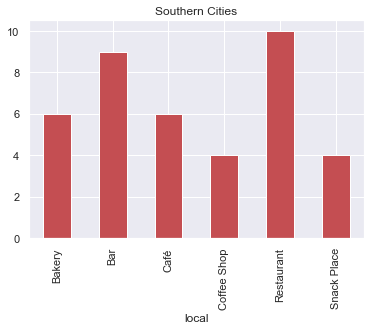

In [202]:
a = '0'
table[a][table[a]>3].plot.bar(color = 'r',title = 'Southern Cities')

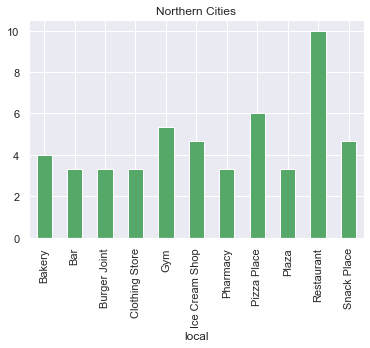

In [205]:
a = '3'
table[a][table[a]>3].plot.bar(color = 'g',title = 'Northern Cities')

In [119]:
table.reset_index()['local']

0                Athletics & Sports
1                         BBQ Joint
2                            Bakery
3                               Bar
4                         Bookstore
                  ...              
75                 Sushi Restaurant
76                       Taco Place
77                         Tea Room
78                          Theater
79    Vegetarian / Vegan Restaurant
Name: local, Length: 80, dtype: object

In [147]:
table['3'] - table['0'] 

local
Athletics & Sports               0.666667
BBQ Joint                       -0.333333
Bakery                          -2.000000
Bar                             -5.666667
Bookstore                        1.333333
                                   ...   
Sushi Restaurant                -2.333333
Taco Place                       0.000000
Tea Room                         0.666667
Theater                         -2.333333
Vegetarian / Vegan Restaurant   -0.333333
Length: 80, dtype: float64

### Lets subtract the vectors in order to vizualize what difers then the most

In [160]:
max(comp)
min(comp)

-5.666666666666666

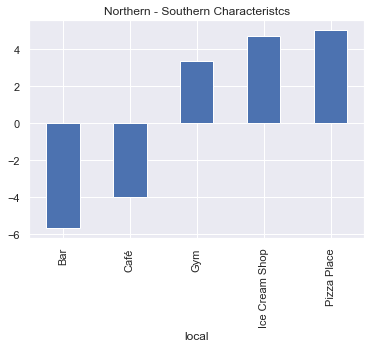

In [207]:
comp = (table['3'] - table['0'])
comp[abs(comp) > 3].plot.bar(title = 'Northern - Southern Characteristcs')

### Once we see that the main caracterists are the pesence of bars and cafés, we chose to explore the bars, once we have geografical information on Beer and acoholic drinks expense for each Brasilian State, from the brazilian government 

In [163]:
Cidades4 = Cidades3[Cidades3['class'] == 2].iloc[:,:5]
Cidades4

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key
24,Aracaju,2800308,Sergipe,174.053,"Aracaju,Sergipe"


In [217]:
data3 = pd.read_excel("alcoholic_drinks_abg_expense.xlsx")
data3

,%Cost_alcoholic_drinks,AVG Cost PER FAMILY,Unidade,Desired_class,Population
0,1.7,2417.84,Alagoas,0,1018948
1,5.0,2552.53,Tocantins,1,299127
2,2.1,2620.93,Maranhão,0,1101884
3,0.9,2830.34,Ceará,0,2669342
4,3.4,2841.37,Piauí,0,864845
5,1.1,2893.59,Paraíba,0,809015
6,1.4,3124.69,Pará,1,1492745
7,1.7,3157.71,Rondônia,1,529544
8,1.6,3218.87,Amazonas,0,2182763
9,0.7,3346.81,Roraima,0,399213


In [177]:
Cidades4 = Cidades3[Cidades3['class'] == 0].iloc[:,:5].join(data3.set_index('Unidade'),on = 'Unidade federativa')
Cidades4

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,%Cost_alcoholic_drinks,AVG Cost PER FAMILY,Desired_class,Population
3,Campo Grande,5002704,Mato Grosso do Sul,8096.051,"Campo Grande,Mato Grosso do Sul",1.6,4903.67,1,895982
10,São Paulo,3550308,São Paulo,1522.986,"São Paulo,São Paulo",1.3,6312.16,0,12252023
11,Rio de Janeiro,3304557,Rio de Janeiro,1182.296,"Rio de Janeiro,Rio de Janeiro",1.6,4611.78,1,6718903
12,Belém,1501402,Pará,1064.918,"Belém,Pará",1.4,3124.69,1,1492745
14,Goiânia,5208707,Goiás,739.492,"Goiânia,Goiás",1.3,4872.92,1,1516113
17,Porto Alegre,4314902,Rio Grande do Sul,496.827,"Porto Alegre,Rio Grande do Sul",1.0,5195.32,0,1483771
18,Curitiba,4106902,Paraná,434.967,"Curitiba,Paraná",1.2,5115.09,0,1933105
19,Florianópolis,4205407,Santa Catarina,433.317,"Florianópolis,Santa Catarina",2.3,4931.18,1,500973
20,Belo Horizonte,3106200,Minas Gerais,313.554,"Belo Horizonte,Minas Gerais",1.3,4390.72,1,2512070
26,Vitória,3205309,Espírito Santo,93.381,"Vitória,Espírito Santo",2.3,4041.14,1,362097


In [178]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

### Vizualizing the correlation between total population and %Cost on Beers and alcohoclic drinks for each city, excluding the exemtre points

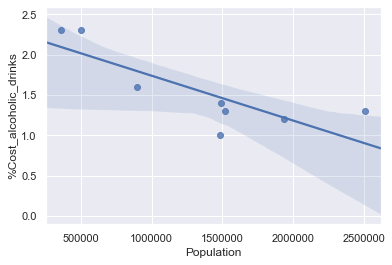

In [235]:
Cidades5  = Cidades4[Cidades4['Population'] < 5000000]
#Cidades5  = Cidades5[Cidades5['%Cost_alcoholic_drinks'] <= max(Cidades5['%Cost_alcoholic_drinks'])]
sns.regplot(x="Population", y="%Cost_alcoholic_drinks", 
            data=Cidades5)

### We can observe that those two variebles are related, but there's one city with a much lower percentege of Expense on Alcoholic drinks. 

In [173]:
Cidades5[Cidades5['%Cost_alcoholic_drinks'] == min(Cidades5['%Cost_alcoholic_drinks'])]

,Sede de governo,Código do IBGE,Unidade federativa,Área (km²),Search Key,%Cost_alcoholic_drinks,AVG Cost PER FAMILY,Desired_class,Population
17,Porto Alegre,4314902,Rio Grande do Sul,496.827,"Porto Alegre,Rio Grande do Sul",1.0,5195.32,0,1483771


### Finally, we consider the city of Porto Alegre a Potencial target to the construction of new Bars, considering that, in this city, the families spend much less that it should, considering the other similar cities and their relation Between population and %Expense on Beer and alcoholic drinks.